### INTRODUCTION

In this notebook, I have studied the current cases of COVID-19 from around the world and mapped them with respective number of Confirmed Cases and number of Deaths for each country around the world. To do that, I have used a Python visualization library, namely Folium. The main point behind using Folium is that it was developed for the sole purpose of visualizing geospatial data. While other libraries are available to visualize geospatial data, such as plotly, they might have a cap on how many API calls we can make within a defined time frame. Folium, on the other hand, is completely free.

### Exploring Datasets with pandas

For this particular problem I have used the CSV file "counties-geographic-coordinates" as the dataset. This file contains total of 4 columns namely 'Country_Code' i.e. The Country Code, 'Latitude', 'Longitude' and 'Country_Name' i.e. the Country Name. Each row represents a Country. For this problem, however we will be using only three columns namely 'Name', 'Latitude' and 'Longitude'. As, for COVID-19 cases we will be scrapping the Google News website to get latest data everytime we run this notebook.

In [1]:
# Importing the NumPy and the Pandas Library.
import numpy as np
import pandas as pd

In [2]:
# The location of the file on the Device (or on the server). 
# After that we are storing the data from the csv file into the variable 'data'.
location = '/home/prashant_pk/Desktop/PK/World_COVID19/countries.csv'
data = pd.read_csv(location)

In [3]:
data.head()

,Country_Code,Latitude,Longitude,Country_Name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [4]:
# Now, I have reduced the columns of the data, so as to contain only necessary information that I require.
df = data[['Country_Name', 'Latitude', 'Longitude']]

In [5]:
df.head()

,Country_Name,Latitude,Longitude
0,Andorra,42.546245,1.601554
1,United Arab Emirates,23.424076,53.847818
2,Afghanistan,33.939110,67.709953
3,Antigua and Barbuda,17.060816,-61.796428
4,Anguilla,18.220554,-63.068615


In [6]:
# Setting the name of the State or Union Territory as the index of the Dataframe.
df.set_index(['Country_Name'], inplace = True)

In [7]:
df.head()

,Latitude,Longitude
Country_Name,,
Andorra,42.546245,1.601554
United Arab Emirates,23.424076,53.847818
Afghanistan,33.939110,67.709953
Antigua and Barbuda,17.060816,-61.796428
Anguilla,18.220554,-63.068615


### Using Folium

Folium is a powerful Python library that helps us to create several types of Leaflet maps. The fact that the Folium results are interactive makes this library is very useful for dashboard building.

In [8]:
#!conda install -c conda-forge folium=0.5.0 --yes
import folium
print('Folium successfully imported!')

Folium successfully imported!


Generating the world map is straigtforward in Folium. We simply create a Folium Map object with parameters 'location', 'zoom_start' or any other and then display it. What is attactive about Folium maps is that they are interactive, so we can very easily zoom into any region of interest despite the initial zoom level.

In [9]:
# Defining the world map.
world_map = folium.Map(zoom_start = 2)

In [10]:
world_map

### Scraping the data from Google News page about COVID-19 cases and transforming it to Pandas Dataframe

In [11]:
import requests
import urllib.request
#import time
from bs4 import BeautifulSoup

Getting the URL of the page and creating a request using requests.get() to get the data from the page.

In [12]:
url = 'https://en.wikipedia.org/wiki/Template:COVID-19_pandemic_data'
response = requests.get(url)

In [13]:
response  # Here in the output [200] means that it went through

<Response [200]>

Scraping the Google News Page content with the help of BeautifulSoup

In [14]:
soup_data = BeautifulSoup(response.text, "html.parser")

Now we will clean the Data so as to get desired data only. After that we will convert the content of the Google News page into a table.

In [15]:
web_data = []
for tr in soup_data.tbody.find_all('tr'):
    web_data.append([ td.get_text().strip() for td in tr.find_all('td')])

In [16]:
web_data

[[],
 [],
 ['1,677,436', '98,024', '341,717', '[9]'],
 ['365,213', '22,746', '149,911', '[10][11]'],
 ['344,481', '3,541', '113,299', '[12]'],
 ['259,559', '36,793', 'No data', '[14][15]'],
 ['235,772', '28,752', '150,376', '[16]'],
 ['229,858', '32,785', '140,479', '[17][18]'],
 ['180,328', '8,367', '161,875', '[20][19]'],
 ['156,827', '4,340', '118,694', '[21]'],
 ['144,921', '28,367', '64,617', '[22]'],
 ['138,845', '4,021', '57,721', '[23]'],
 ['135,701', '7,417', '105,801', '[24]'],
 ['119,959', '3,456', '49,795', '[25][26]'],
 ['84,699', '6,424', '43,985', '[27]'],
 ['82,985', '4,634', '78,268', '[28]'],
 ['72,560', '390', '43,520', '[29]'],
 ['69,102', '718', '28,148', '[36]'],
 ['68,620', '7,394', '47,424', '[37][38]'],
 ['57,092', '9,280', '15,272', '[40]'],
 ['54,601', '1,133', '17,198', '[41]'],
 ['45,236', '5,822', 'No data', '[43]'],
 ['43,714', '23', '9,170', '[44]'],
 ['36,756', '3,108', '3,560', '[45]'],
 ['36,198', '199', '14,155', '[46]'],
 ['33,610', '480', '6,901', 

Now, we will create the dataframe of the 'web_data' table that contains our data values.

In [17]:
cases_df = pd.DataFrame(web_data, columns = ['Cases', 'Death', 'Recovered', 'Ref'])

In [18]:
cases_df.dropna(axis = 0, inplace = True)
cases_df = cases_df.iloc[0 : , : ]
cases_df

,Cases,Death,Recovered,Ref
2,"1,677,436","98,024","341,717",[9]
3,"365,213","22,746","149,911",[10][11]
4,"344,481","3,541","113,299",[12]
5,"259,559","36,793",No data,[14][15]
6,"235,772","28,752","150,376",[16]
...,...,...,...,...
225,3,0,3,[284]
226,2,0,2,[285]
227,2,0,0,[286]
228,2,0,2,[287]


In [19]:
cases_df.reset_index(inplace = True)
cases_df.drop(columns = ['index', 'Ref'], axis = 0, inplace = True)
cases_df.head()

,Cases,Death,Recovered
0,"1,677,436","98,024","341,717"
1,"365,213","22,746","149,911"
2,"344,481","3,541","113,299"
3,"259,559","36,793",No data
4,"235,772","28,752","150,376"


In [20]:
cases_df.shape

(228, 3)

In [21]:
country_name = []
for th in soup_data.tbody.find_all('th'):
    country_name.append([ a.get_text().strip() for a in th.find_all('a')])

In [22]:
country_name

[['[a]'],
 ['[b]'],
 ['[c]'],
 ['[d]'],
 [],
 [],
 [],
 [],
 [],
 ['[2]'],
 [],
 ['United States', '[e]'],
 [],
 ['Brazil'],
 [],
 ['Russia', '[f]'],
 [],
 ['United Kingdom', '[g]'],
 [],
 ['Spain', '[h]'],
 [],
 ['Italy'],
 [],
 ['Germany', '[i]'],
 [],
 ['Turkey'],
 [],
 ['France', '[j]'],
 [],
 ['India'],
 [],
 ['Iran'],
 [],
 ['Peru'],
 [],
 ['Canada'],
 [],
 ['China', '[k]'],
 [],
 ['Saudi Arabia'],
 [],
 ['Chile', '[l]'],
 [],
 ['Mexico'],
 [],
 ['Belgium', '[m]'],
 [],
 ['Pakistan'],
 [],
 ['Netherlands', '[n]'],
 [],
 ['Qatar'],
 [],
 ['Ecuador'],
 [],
 ['Belarus'],
 [],
 ['Bangladesh'],
 [],
 ['Sweden'],
 [],
 ['Singapore'],
 [],
 ['Switzerland'],
 [],
 ['Portugal'],
 [],
 ['United Arab Emirates'],
 [],
 ['Ireland'],
 [],
 ['South Africa'],
 [],
 ['Indonesia'],
 [],
 ['Poland'],
 [],
 ['Kuwait'],
 [],
 ['Colombia'],
 [],
 ['Ukraine', '[o]'],
 [],
 ['Romania'],
 [],
 ['Egypt', '[p]'],
 [],
 ['Israel', '[q]'],
 [],
 ['Japan', '[r]'],
 [],
 ['Austria'],
 [],
 ['Dominican Republic

In [23]:
country_df = pd.DataFrame(country_name, columns = ['Country_Name', 'None'])
country_df

,Country_Name,None
0,[a],None
1,[b],None
2,[c],None
3,[d],None
4,None,None
...,...,...
461,Lesotho,None
462,None,None
463,Sint Eustatius,None
464,None,None


In [24]:
country_df.dropna(axis = 0, how = 'all', inplace = True)
country_df

,Country_Name,None
0,[a],None
1,[b],None
2,[c],None
3,[d],None
9,[2],None
...,...,...
457,Saba,None
459,Bonaire,None
461,Lesotho,None
463,Sint Eustatius,None


In [25]:
country_df = country_df.iloc[5 : , :]
country_df

,Country_Name,None
11,United States,[e]
13,Brazil,None
15,Russia,[f]
17,United Kingdom,[g]
19,Spain,[h]
...,...,...
457,Saba,None
459,Bonaire,None
461,Lesotho,None
463,Sint Eustatius,None


In [26]:
country_df.reset_index(inplace = True)
country_df.drop(columns = ['index', 'None'], axis = 0, inplace = True)
country_df.head()

/home/prashant_pk/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Country_Name
0,United States
1,Brazil
2,Russia
3,United Kingdom
4,Spain


In [27]:
country_df.shape

(228, 1)

In [28]:
country_cases_df = country_df.merge(cases_df, left_index = True, right_index = True)

In [29]:
country_cases_df

,Country_Name,Cases,Death,Recovered
0,United States,"1,677,436","98,024","341,717"
1,Brazil,"365,213","22,746","149,911"
2,Russia,"344,481","3,541","113,299"
3,United Kingdom,"259,559","36,793",No data
4,Spain,"235,772","28,752","150,376"
...,...,...,...,...
223,Saba,3,0,3
224,Bonaire,2,0,2
225,Lesotho,2,0,0
226,Sint Eustatius,2,0,2


In [30]:
country_cases_df.set_index(['Country_Name'], inplace = True)
country_cases_df.head()

,Cases,Death,Recovered
Country_Name,,,
United States,"1,677,436","98,024","341,717"
Brazil,"365,213","22,746","149,911"
Russia,"344,481","3,541","113,299"
United Kingdom,"259,559","36,793",No data
Spain,"235,772","28,752","150,376"


After that I have merged the Countries dataFrame that contains the Country Name, Latitude and Longitude of all the states of India with the Cases DataFrame that contains the number of cases with respect to the Country names. This is the final DataFrame that I have used in the notebook.

In [31]:
final_cases_df = df.merge(country_cases_df, left_index = True, right_index = True)

In [32]:
final_cases_df.head()

,Latitude,Longitude,Cases,Death,Recovered
Country_Name,,,,,
Andorra,42.546245,1.601554,762,51,653
United Arab Emirates,23.424076,53.847818,"29,485",245,"15,056"
Afghanistan,33.939110,67.709953,"10,582",218,"1,075"
Anguilla,18.220554,-63.068615,3,0,3
Albania,41.153332,20.168331,998,32,789


In [33]:
final_cases_df.reset_index(inplace = True)

In [34]:
final_cases_df.rename(columns = {'index' : 'Country_Name'}, inplace = True)

In [35]:
final_cases_df.head()

,Country_Name,Latitude,Longitude,Cases,Death,Recovered
0,Andorra,42.546245,1.601554,762,51,653
1,United Arab Emirates,23.424076,53.847818,"29,485",245,"15,056"
2,Afghanistan,33.939110,67.709953,"10,582",218,"1,075"
3,Anguilla,18.220554,-63.068615,3,0,3
4,Albania,41.153332,20.168331,998,32,789


In [36]:
folium_cases_df = final_cases_df[['Country_Name', 'Latitude', 'Longitude', 'Cases', 'Death', 'Recovered']]

In [37]:
final_cases_df.head()

,Country_Name,Latitude,Longitude,Cases,Death,Recovered
0,Andorra,42.546245,1.601554,762,51,653
1,United Arab Emirates,23.424076,53.847818,"29,485",245,"15,056"
2,Afghanistan,33.939110,67.709953,"10,582",218,"1,075"
3,Anguilla,18.220554,-63.068615,3,0,3
4,Albania,41.153332,20.168331,998,32,789


In [38]:
folium_cases_df.head()

,Country_Name,Latitude,Longitude,Cases,Death,Recovered
0,Andorra,42.546245,1.601554,762,51,653
1,United Arab Emirates,23.424076,53.847818,"29,485",245,"15,056"
2,Afghanistan,33.939110,67.709953,"10,582",218,"1,075"
3,Anguilla,18.220554,-63.068615,3,0,3
4,Albania,41.153332,20.168331,998,32,789


In [39]:
final_cases_df['Cases'] = final_cases_df['Cases'].str.replace(',', '')
final_cases_df['Death'] = final_cases_df['Death'].str.replace(',', '')
final_cases_df['Recovered'] = final_cases_df['Recovered'].str.replace(',', '')

final_cases_df['Cases'] = final_cases_df['Cases'].str.replace('—', '0')
final_cases_df['Death'] = final_cases_df['Death'].str.replace('—', '0')
final_cases_df['Recovered'] = final_cases_df['Recovered'].str.replace('—', '0')

final_cases_df['Cases'] = final_cases_df['Cases'].str.replace('No data', '0')
final_cases_df['Death'] = final_cases_df['Death'].str.replace('No data', '0')
final_cases_df['Recovered'] = final_cases_df['Recovered'].str.replace('No data', '0')

In [40]:
final_cases_df[['Cases', 'Death', 'Recovered']] = final_cases_df[['Cases', 'Death', 'Recovered']].astype(int)

In [41]:
final_cases_df

,Country_Name,Latitude,Longitude,Cases,Death,Recovered
0,Andorra,42.546245,1.601554,762,51,653
1,United Arab Emirates,23.424076,53.847818,29485,245,15056
2,Afghanistan,33.939110,67.709953,10582,218,1075
3,Anguilla,18.220554,-63.068615,3,0,3
4,Albania,41.153332,20.168331,998,32,789
...,...,...,...,...,...,...
184,Kosovo,42.602636,20.902977,1032,29,785
185,Yemen,15.552727,48.516388,222,42,10
186,South Africa,-30.559482,22.937506,22583,429,10104
187,Zambia,-13.133897,27.849332,920,7,336


In [42]:
total_cases_worldwide = final_cases_df['Cases'].sum(axis = 0, skipna = True)
total_death_worldwide = final_cases_df['Death'].sum(axis = 0, skipna = True)
total_recovered_worldwide = final_cases_df['Recovered'].sum(axis = 0, skipna = True)

In [43]:
total_cases = f'{total_cases_worldwide:,}'
print('Total Number of COVID-19 Cases around the World are: ', total_cases)

Total Number of COVID-19 Cases around the World are:  5,394,448


In [44]:
total_deaths = f'{total_death_worldwide : ,}'
print('Total Number of Deaths due to COVID-19 around the World are: ', total_deaths)

Total Number of Deaths due to COVID-19 around the World are:   344,809


In [45]:
total_recovered = f'{total_recovered_worldwide : ,}'
print('Total Number of Recovered Cases due to COVID-19 around the World are: ', total_recovered)

Total Number of Recovered Cases due to COVID-19 around the World are:   2,139,315


In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

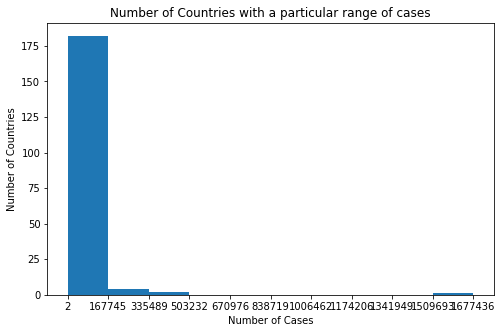

In [47]:
count, bin_edges = np.histogram(final_cases_df['Cases'])

final_cases_df['Cases'].plot(kind='hist', figsize=(8, 5), xticks = bin_edges)

plt.title('Number of Countries with a particular range of cases') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Cases') # add x-label

plt.show()

In the above plot, the x-axis represents the range of Confirmed Cases in intervals of 1151. The y-axis represents the number of states that contributed to the aforementioned cases.

From the plot we can conclude that almost 25 countries have cases between 1 to 1152, while only one state of India has greater than 10000 number of cases.

In [48]:
max_cases_df = final_cases_df.sort_values(['Cases'], ascending = False).head(10)
max_cases_df

,Country_Name,Latitude,Longitude,Cases,Death,Recovered
176,United States,37.090240,-95.712891,1677436,98024,341717
23,Brazil,-14.235004,-51.925280,365213,22746,149911
150,Russia,61.524010,105.318756,344481,3541,113299
58,United Kingdom,55.378051,-3.435973,259559,36793,0
51,Spain,40.463667,-3.749220,235772,28752,150376
85,Italy,41.871940,12.567380,229858,32785,140479
41,Germany,51.165691,10.451526,180328,8367,161875
171,Turkey,38.963745,35.243322,156827,4340,118694
56,France,46.227638,2.213749,144921,28367,64617
81,India,20.593684,78.962880,138845,4021,57721


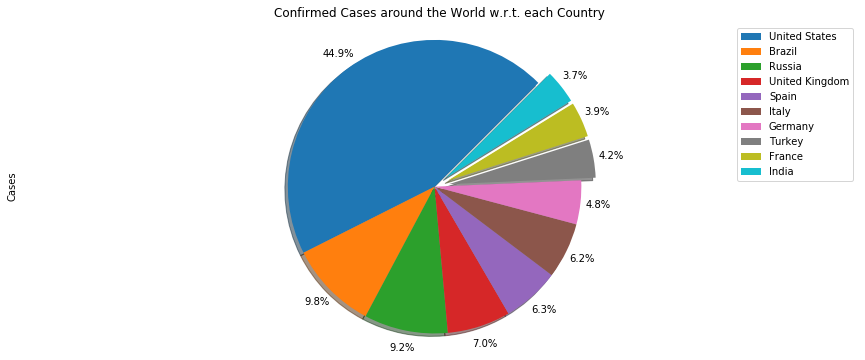

In [49]:
explode_list = [0, 0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1]
max_cases_df['Cases'].plot(
                            kind = 'pie',
                            figsize = (15, 6),
                            autopct = '%1.1f%%', 
                            startangle = 45,    
                            shadow = True,       
                            labels = None,         # turn off labels on pie chart
                            pctdistance = 1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            explode = explode_list
                            )

plt.title('Confirmed Cases around the World w.r.t. each Country')
plt.axis('equal')

# add legend
plt.legend(labels = max_cases_df['Country_Name'], loc='upper right') 

plt.show()

In [50]:
max_deaths_df = final_cases_df.sort_values(['Death'], ascending = False).head(10)
max_deaths_df

,Country_Name,Latitude,Longitude,Cases,Death,Recovered
176,United States,37.090240,-95.712891,1677436,98024,341717
58,United Kingdom,55.378051,-3.435973,259559,36793,0
85,Italy,41.871940,12.567380,229858,32785,140479
51,Spain,40.463667,-3.749220,235772,28752,150376
56,France,46.227638,2.213749,144921,28367,64617
23,Brazil,-14.235004,-51.925280,365213,22746,149911
14,Belgium,50.503887,4.469936,57092,9280,15272
41,Germany,51.165691,10.451526,180328,8367,161875
83,Iran,32.427908,53.688046,135701,7417,105801
124,Mexico,23.634501,-102.552784,68620,7394,47424


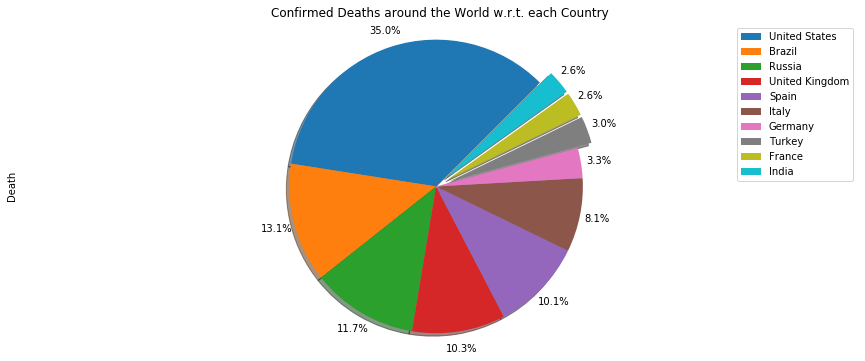

In [51]:
explode_list1 = [0, 0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1]

max_deaths_df['Death'].plot(
                            kind = 'pie',
                            figsize = (15, 6),
                            autopct = '%1.1f%%', 
                            startangle = 45,    
                            shadow = True,       
                            labels = None,         # turn off labels on pie chart
                            pctdistance = 1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            explode = explode_list
                            )

plt.title('Confirmed Deaths around the World w.r.t. each Country')
plt.axis('equal')

# add legend
plt.legend(labels = max_cases_df['Country_Name'], loc='upper right') 

plt.show()

In [52]:
# Defining the world map.
world_map = folium.Map(location = [0, 0], zoom_start = 2)
world_map

In [53]:
# Instantiating a feature group for the cases in the dataframe.

cases = folium.map.FeatureGroup()


for lat, lng, in zip(folium_cases_df.Latitude, folium_cases_df.Longitude):
    cases.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius = 2, # define how big you want the circle markers to be
            color = 'yellow',
            fill = True,
            fill_color = 'blue',
            fill_opacity = 0.6
        )
    )

In [54]:
# Adding Cases to the map of India
world_map.add_child(cases)

In [55]:
# Instantiating a feature group for the cases in the dataframe.
cases = folium.map.FeatureGroup()

# Looping through the cases and adding each to the cases feature group
for lat, lng, in zip(folium_cases_df.Latitude, folium_cases_df.Longitude):
    cases.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius = 2, # define how big you want the circle markers to be
            color = 'yellow',
            fill = True,
            fill_color = 'blue',
            fill_opacity = 0.2
        )
    )
    
# Adding a pop-up text for each marker on the map
latitudes = list(folium_cases_df.Latitude)
longitudes = list(folium_cases_df.Longitude)
labels = list(folium_cases_df.Cases)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(world_map)    
    
# Adding Cases to the map of the World
world_map.add_child(cases)

In [56]:
# Instantiating a feature group for the deaths in the dataframe.
deaths = folium.map.FeatureGroup()

# Looping through the cases and adding each to the cases feature group
for lat, lng, in zip(folium_cases_df.Latitude, folium_cases_df.Longitude):
    deaths.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=2, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# Adding a pop-up text for each marker on the map
latitudes = list(folium_cases_df.Latitude)
longitudes = list(folium_cases_df.Longitude)
labels = list(folium_cases_df.Death)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(world_map)    
    
# Adding Cases to the map of the world
world_map.add_child(deaths)


# show map
world_map

In [57]:
# download countries geojson file
!wget --quiet https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/world_countries.json -O world_countries.json
    
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [58]:
world_geo = r'world_countries.json' # geojson file

# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2)

threshold_scale = np.linspace(final_cases_df['Cases'].min(),
                              final_cases_df['Cases'].max(),
                              6, dtype = int)
threshold_scale = threshold_scale.tolist() # change the numpy array to a list
threshold_scale[-1] = threshold_scale[-1] + 1 # make sure that the last value of the list is greater than the maximum immigration


# let Folium determine the scale.

world_map.choropleth(
    geo_data = world_geo,
    data = final_cases_df,
    columns = ['Country_Name', 'Cases'],
    key_on = 'feature.properties.name',
    threshold_scale = threshold_scale,
    fill_color = 'YlOrRd', 
    fill_opacity = 0.7, 
    line_opacity = 0.2,
    legend_name = 'Total Number of Cases around the World'
)

world_map